In [2]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [3]:
# Read data into a DataFrame.
data_url = 'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Sales ~ TV+Radio+Newspaper'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

In [5]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [6]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [7]:
lm.rsquared

0.8972106381789522

In [8]:
linear_formula_new = 'Sales ~ TV+Radio'

# Fit the model to our data using the formula.
lm1 = smf.ols(formula=linear_formula_new, data=data).fit()

In [9]:
lm1.rsquared

0.8971942610828957

In [10]:
lm1.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [11]:
lm1.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

## Discussion of Drill ##

* Only the slightest decrease in R^2.

* p-values are extremely significant

* Parameters are virtually the same.

* Very little overall change

In [12]:
lm1.conf_int()

,0,1
Intercept,2.340343,3.501857
TV,0.043013,0.048497
Radio,0.172139,0.203850


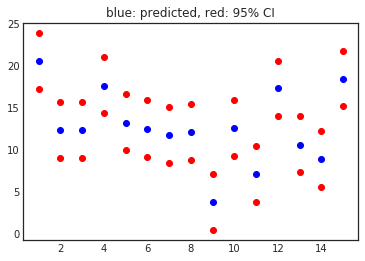

In [13]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm1)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()